# Plotting 2D phase portraits in Julia

for $2 \times 2$ system $x' = Ax$.

In [6]:
using PyPlot

function phaseplot(A)
    xmag,ymag = 4,3
    xgrid = linspace(-xmag,xmag,20)
    ygrid = linspace(-ymag,ymag,20)
    dxdt = [A[1,1]*x + A[1,2]*y for y in ygrid, x in xgrid]
    dydt = [A[2,1]*x + A[2,2]*y for y in ygrid, x in xgrid]
    quiver(xgrid, ygrid, dxdt, dydt, width=0.002)

    # calculate eigenvalues and eigenvectors
    (λ, v) = eig(A)
    
    @show λ
    #@show v
    
    if isreal(λ)
        v1 = v[:,1]
        v2 = v[:,2]

        # plot eigenvectors
        plot([0.0;  v1[1]], [0.0;  v1[2]], "b-", linewidth=2, label="v1")
        plot([0.0; -v1[1]], [0.0; -v1[2]], "b--")
        plot([0.0;  v2[1]], [0.0;  v2[2]], "r-", linewidth=2, label="v2")
        plot([0.0; -v2[1]], [0.0; -v2[2]], "r--")
    
        # plot trajectories over grid of initial values x₀, y₀
        t = linspace(0, 1, 100)
        for x₀ in linspace(-xmag, xmag, 6)
            for y₀ in linspace(-ymag, ymag, 6)
                c = v\[x₀; y₀]  # solve for coefficients c of x in eigenvector basis
                x = c[1]*exp.(λ[1]*t)*v[1,1] + c[2]*exp.(λ[2]*t)*v[1,2]
                y = c[1]*exp.(λ[1]*t)*v[2,1] + c[2]*exp.(λ[2]*t)*v[2,2]
                plot([x[1]], [y[1]], "go", markersize=4)
                plot(x, y, "g-", linewidth=1)
            end
        end
        
    else
        vᵣ, vᵢ = real(v[:,1]), imag(v[:,1])      
        
        # plot real and imaginary parts of eigenvector
        plot([0.0;  vᵣ[1]], [0.0;  vᵣ[2]], "b-", linewidth=2, label="vr")
        plot([0.0; -vᵣ[1]], [0.0; -vᵣ[2]], "b--")
        plot([0.0;  vᵢ[1]], [0.0;  vᵢ[2]], "r-", linewidth=2, label="vi")
        plot([0.0; -vᵢ[1]], [0.0; -vᵢ[2]], "r--")
        
        # plot trajectories over grid of initial values x₀, y₀
        t = linspace(0, 4, 100)
        for x₀ in linspace(-xmag, xmag, 6)
            for y₀ in linspace(-ymag, ymag, 6)
                c = v\[x₀; y₀]  # solve for coefficients c of x in eigenvector basis
                x = real(c[1]*v[1,1]*exp.(λ[1]*t) + c[2]*v[1,2]*exp.(λ[2]*t))
                y = real(c[1]*v[2,1]*exp.(λ[1]*t) + c[2]*v[2,2]*exp.(λ[2]*t))
           
                plot([x[1]], [y[1]], "go", markersize=4)
                plot(x, y, "g-",linewidth=1)
            end
        end
    end
        
    xlim(-xmag, xmag)
    ylim(-ymag, ymag)
    xlabel("x")
    ylabel("y")
end


phaseplot (generic function with 1 method)

In [7]:
A = [2 3 ; 2 1]
λ = eigvals(A)
@show λ;

λ = [4.0, -1.0]


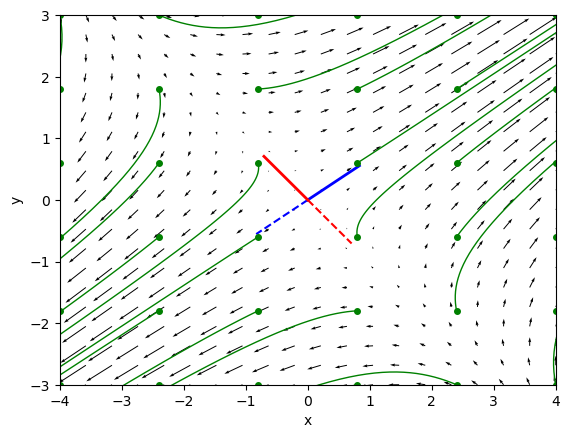

λ = [4.0, -1.0]


PyObject Text(24,0.5,u'y')

In [3]:
phaseplot(A)

In [8]:
A = [1 -5 ; 2 3]
λ = eigvals(A)
@show λ;

λ = Complex{Float64}[2.0+3.0im, 2.0-3.0im]


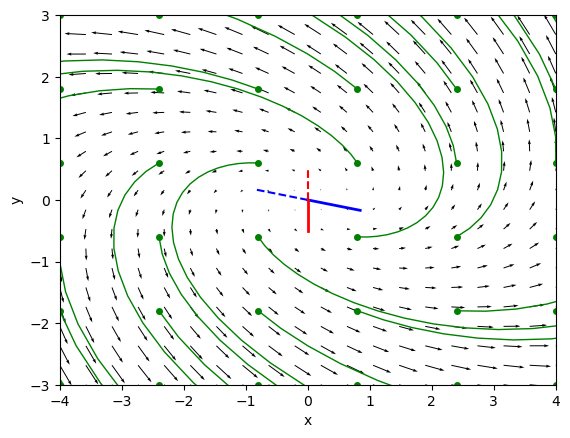

λ = Complex{Float64}[2.0+3.0im, 2.0-3.0im]


PyObject Text(24,0.5,u'y')

In [9]:
phaseplot(A)

In [ ]:
A = [0 1; -1 0]
λ = eigvals(A)
@show λ;